In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.datasets import load_digits
%matplotlib inline

## Question 1
Import the Data set Sklearn

In [2]:
digit=load_digits()           ##importing datasets

## Question 2

In [ ]:
p=digit.data
q=digit.target

In [3]:
p.shape, q.shape

((1797L, 64L), (1797L,))

## Question 3
Split the dataset into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.4)

## Question 4
Use KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model=KNeighborsClassifier()

In [8]:
model.fit(p_train,q_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
pred=model.predict(p_test)

In [10]:
result=pd.DataFrame({"Predicted":pred,"Actual":q_test})

In [11]:
result.head()

,Actual,Predicted
0,3,3
1,9,9
2,7,7
3,5,5
4,8,8


## Question 5
Printing KNN score

In [12]:
model.score(p_test,q_test)*100

98.0528511821975

In [13]:
kfold=model_selection.KFold(n_splits=10,random_state=7)  

In [27]:
res1=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="accuracy")      
res1

array([0.92777778, 0.98888889, 0.98888889, 0.97777778, 0.96111111,
       0.97777778, 0.98888889, 0.98324022, 0.98324022, 0.96089385])

In [28]:
res1.sum()/10

0.9738485412787089

In [29]:
res2=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="neg_log_loss")
res2

array([-0.66831426, -0.02962516, -0.07148313, -0.06420906, -0.43955895,
       -0.03856648, -0.03964212, -0.0349096 , -0.25194677, -0.45336659])

In [30]:
res2.sum()/10

-0.20916221370203658

In [31]:
res3=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="r2")
res3

array([0.79070984, 0.96508651, 0.9865416 , 0.89711804, 0.86423228,
       0.93159295, 0.96400498, 0.93248526, 0.93913773, 0.9148542 ])

In [32]:
res3.sum()/10

0.9185763399522179

In [22]:
print(classification_report(q_test,pred)) 

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        80
          1       0.95      0.99      0.97        80
          2       1.00      1.00      1.00        66
          3       0.97      0.97      0.97        73
          4       0.99      0.99      0.99        73
          5       0.96      0.99      0.97        67
          6       0.99      0.99      0.99        71
          7       0.97      1.00      0.99        71
          8       0.99      0.95      0.97        73
          9       1.00      0.95      0.98        65

avg / total       0.98      0.98      0.98       719



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(q_test,pred)

array([[79,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 79,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 66,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 71,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 72,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 66,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 70,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 69,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 62]], dtype=int64)

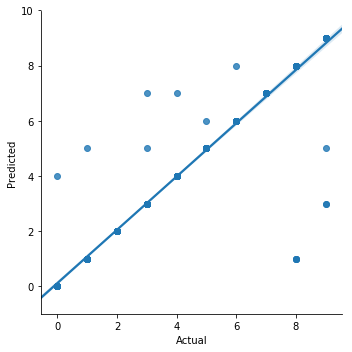

In [26]:
sns.lmplot('Actual',y='Predicted',data = result)

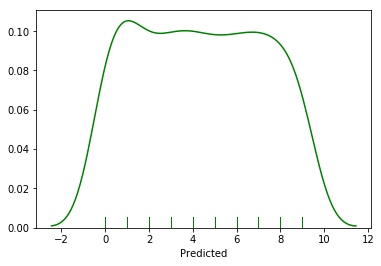

In [34]:
sns.distplot(result['Predicted'],kde=True, color="green", hist=False, rug=True)